In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale

import warnings

warnings.filterwarnings('ignore')

<h3>1) Data preparation and stardartization</h3>

In [2]:
df = pd.read_csv('./data/regresion_data.csv')

df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='label')

df

,axial_max,tang_max,index_of_axm,index_of_tnm,axial_in_mxt,tang_in_mxa,cone_angl,frequancy
0,-16.549675,-17.654378,28,48,-10.975493,-16.597827,4,126.984123
1,-16.564726,-17.815883,28,52,-14.410172,-16.724255,4,126.984123
2,-16.335568,-17.578816,28,50,-12.664116,-16.415995,4,125.152626
3,-15.968865,-17.108087,28,47,-10.236513,-15.878571,4,120.879120
4,-15.227270,-16.266240,28,49,-12.056063,-15.246275,4,114.774117
...,...,...,...,...,...,...,...,...
701,-12.023019,-7.729243,22,39,-9.648130,-6.059585,15,76.312576
702,-12.288681,-7.505596,25,40,-10.345298,-5.331225,15,77.533577
703,-12.301400,-7.318260,23,40,-10.514462,-5.200852,15,78.754578
704,-12.464419,-6.943085,23,39,-9.774318,-4.769759,15,77.533577


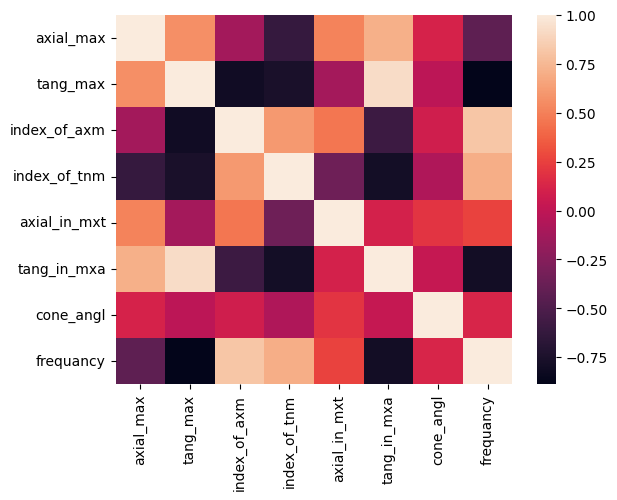

In [3]:
# Let's build correlation and some graphs
sns.heatmap(df.corr())

# And some estimators
print()

In [4]:
X = df.drop(columns='frequancy')
y = df['frequancy']



# standartization and train test split
mean = X.mean(axis=0)
std = X.std(axis=0)
X -= mean
X /= std
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape[1])


7


<h3>2) Simple model for regression</h3>

In [5]:
model = Sequential()
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(14, activation='relu'))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])



In [11]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=1200)

Epoch 1/1200
15/15 [==============================] - 0s 6ms/step - loss: 124.1413 - mse: 124.1413 - mae: 5.3975 - val_loss: 92.1374 - val_mse: 92.1374 - val_mae: 4.1510
Epoch 2/1200
15/15 [==============================] - 0s 3ms/step - loss: 121.9541 - mse: 121.9541 - mae: 5.2778 - val_loss: 91.6286 - val_mse: 91.6286 - val_mae: 4.1081
Epoch 3/1200
15/15 [==============================] - 0s 4ms/step - loss: 121.5357 - mse: 121.5357 - mae: 5.1958 - val_loss: 91.2146 - val_mse: 91.2146 - val_mae: 4.0934
Epoch 4/1200
15/15 [==============================] - 0s 4ms/step - loss: 121.9985 - mse: 121.9985 - mae: 5.1944 - val_loss: 90.2677 - val_mse: 90.2677 - val_mae: 4.0409
Epoch 5/1200
15/15 [==============================] - 0s 4ms/step - loss: 121.7903 - mse: 121.7903 - mae: 5.2279 - val_loss: 92.2676 - val_mse: 92.2676 - val_mae: 4.1301
Epoch 6/1200
15/15 [==============================] - 0s 4ms/step - loss: 120.8598 - mse: 120.8598 - mae: 5.1963 - val_loss: 91.1139 - val_mse: 91.113

5/5 [==============================] - 0s 2ms/step


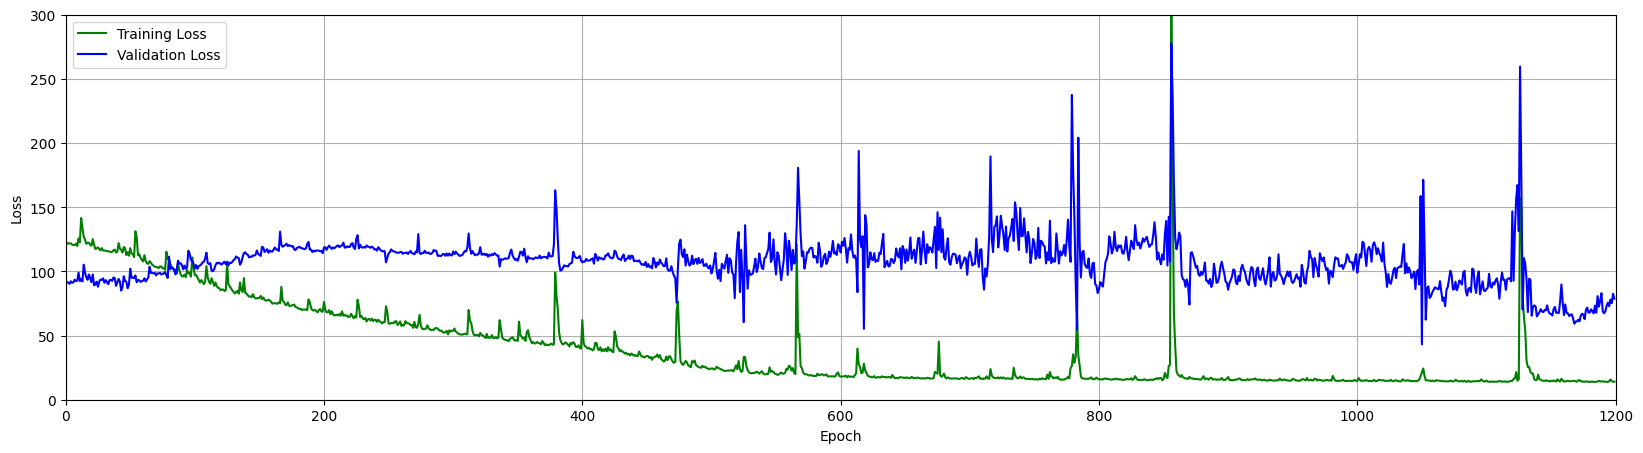

In [13]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 1200])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

In [8]:
print(y_pred.shape)
print(y_pred.dtype)
print(type(y_pred))
print(Y_test.shape)

(142, 1)
float32
<class 'numpy.ndarray'>
(142,)


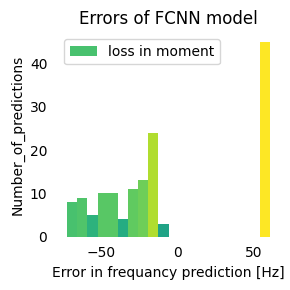

In [9]:
losses = y_pred[0] - Y_test
'''
for i in range(len(losses)):
    if(losses[i] >= 25):
        losses[i] = 0
'''
fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

In [15]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 
from keras import layers 
from keras.utils import plot_model

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 7)                 105       
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 4)                 3

<h3>3) Recurent Regression model  </h3>

In [16]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(64,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(1))


In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse', 'mae'])

history = model.fit(X_train, Y_train, validation_split=0.4, epochs=1200, batch_size = 100)


Epoch 1/1200
4/4 [==============================] - 1s 62ms/step - loss: 6612.9380 - mse: 6612.7773 - mae: 66.6634 - val_loss: 7033.5015 - val_mse: 7033.4326 - val_mae: 69.3316
Epoch 2/1200
4/4 [==============================] - 0s 12ms/step - loss: 6586.2734 - mse: 6586.1064 - mae: 66.5559 - val_loss: 7019.2227 - val_mse: 7019.1538 - val_mae: 69.2719
Epoch 3/1200
4/4 [==============================] - 0s 11ms/step - loss: 6568.3589 - mse: 6568.1841 - mae: 66.4951 - val_loss: 7007.5474 - val_mse: 7007.4766 - val_mae: 69.2224
Epoch 4/1200
4/4 [==============================] - 0s 17ms/step - loss: 6551.2588 - mse: 6551.0737 - mae: 66.4404 - val_loss: 6997.5952 - val_mse: 6997.5225 - val_mae: 69.1819
Epoch 5/1200
4/4 [==============================] - 0s 15ms/step - loss: 6533.9971 - mse: 6533.8027 - mae: 66.3962 - val_loss: 6988.3276 - val_mse: 6988.2544 - val_mae: 69.1460
Epoch 6/1200
4/4 [==============================] - 0s 12ms/step - loss: 6517.7500 - mse: 6517.5474 - mae: 66.3549 

5/5 [==============================] - 0s 2ms/step


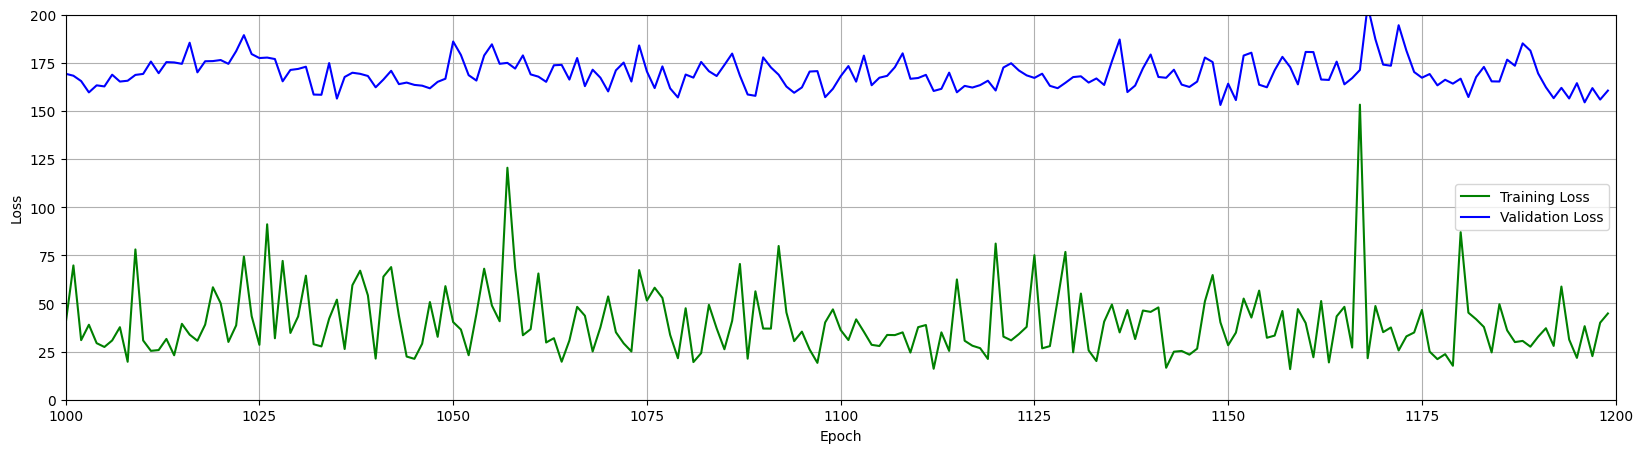

In [23]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([1000, 1200])
    plt.ylim([0, 200])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

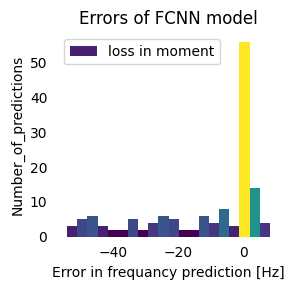

In [28]:
losses = np.array(y_pred[0] - Y_test)

fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

In [26]:
print(losses.shape)
print(type(losses))

(142,)
<class 'pandas.core.series.Series'>
